In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import plotly.graph_objects as go
import pydmd
from sklearn.metrics import mean_absolute_error
from datetime import datetime


In [2]:
df = pd.DataFrame()
matx = pd.read_csv("DATA/NSE500i.csv",header=None) #VARIABLE 1
matx = pd.DataFrame(matx.transpose())
matx = matx.fillna(0)

In [3]:
matx.shape

(461, 1461)

In [4]:
sym = pd.read_csv("DATA/nse50_sym.csv",header=None) #VARIABLE 2

In [5]:
j=191
df = []
i=6 # VARIABLE 3
  
mat = matx.iloc[:, -(i+j):-j]
day2 = matx.iloc[:, -(i+j)+1]
mat=mat.to_numpy()


In [6]:
day0 = matx.iloc[:, -j-1]
day1 = matx.iloc[:, -j]
day2 = matx.iloc[:, -j+1]
day3 = matx.iloc[:, -j+2]
day4 = matx.iloc[:, -j+3]
day5 = matx.iloc[:, -j+4]
day6 = matx.iloc[:, -j+5]
day7 = matx.iloc[:, -j+6]
day8 = matx.iloc[:, -j+7]
day9 = matx.iloc[:, -j+8]

In [7]:
dmd = pydmd.DMD(svd_rank=mat.shape[1])
dmd.fit(mat)
dmd.dmd_time['tend'] = dmd.dmd_time['tend'] + 9
dmd.reconstructed_data.shape

(461, 15)

In [8]:
pred = dmd.reconstructed_data
pday1 = np.real(pred[:,-9])
pday2 = np.real(pred[:,-8])
pday3 = np.real(pred[:,-7])
pday4 = np.real(pred[:,-6])
pday5 = np.real(pred[:,-5])
pday6 = np.real(pred[:,-4])
pday7 = np.real(pred[:,-3])
pday8 = np.real(pred[:,-2])
pday9 = np.real(pred[:,-1])


In [9]:
print("day1 : ",mean_absolute_error(day1,pday1))
print("day2 : ",mean_absolute_error(day2,pday2))
print("day3 : ",mean_absolute_error(day3,pday3))
print("day4 : ",mean_absolute_error(day4,pday4))
print("day5 : ",mean_absolute_error(day5,pday5))
print("day6 : ",mean_absolute_error(day6,pday6))
print("day7 : ",mean_absolute_error(day7,pday7))
print("day8 : ",mean_absolute_error(day8,pday8))
print("day9 : ",mean_absolute_error(day9,pday9)) 

day1 :  39.50779190880999
day2 :  77.03966150395316
day3 :  124.98073324886794
day4 :  78.79816694129099
day5 :  61.16537886392982
day6 :  60.84577009596845
day7 :  67.89852331905102
day8 :  99.75361396660777
day9 :  133.46873877182335


EXAMPLE

1	ADANIPORTS.NS

2nd in array 

In [10]:
print("day1 : ",day1[1]," - pred :",pday1[1])
print("day2 : ",day2[1]," - pred :",pday2[1])
print("day3 : ",day3[1]," - pred :",pday3[1])
print("day4 : ",day4[1]," - pred :",pday4[1])
print("day5 : ",day5[1]," - pred :",pday5[1])


day1 :  2238.0  - pred : 2221.6002978403076
day2 :  2179.25  - pred : 2297.0490374895808
day3 :  2091.0  - pred : 2362.619088109247
day4 :  2045.849976  - pred : 2349.6008082929093
day5 :  2033.300049  - pred : 2355.3531143447344


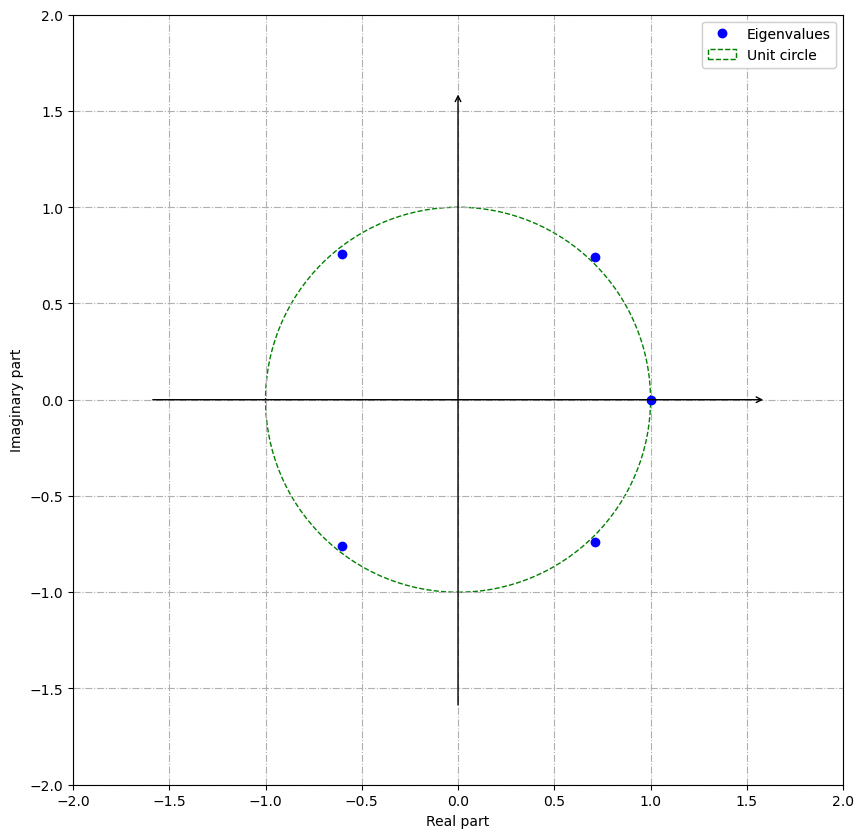

In [11]:
dmd.plot_eigs(show_axes=True, show_unit_circle=True, figsize=(10,10))

In [12]:
dmd.amplitudes.real

array([106759.77829041,   1131.79232474,   1131.79232474,    242.19057012,
          242.19057012])

c:\Users\HAI\anaconda3\envs\normie\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


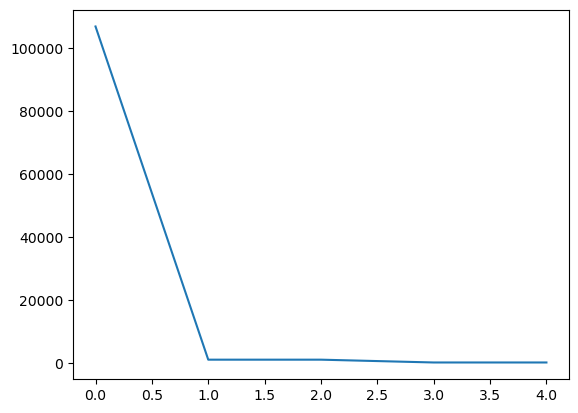

In [13]:
plt.plot(dmd.amplitudes)

In [14]:
np.max(dmd.amplitudes.real)

106759.77829041127

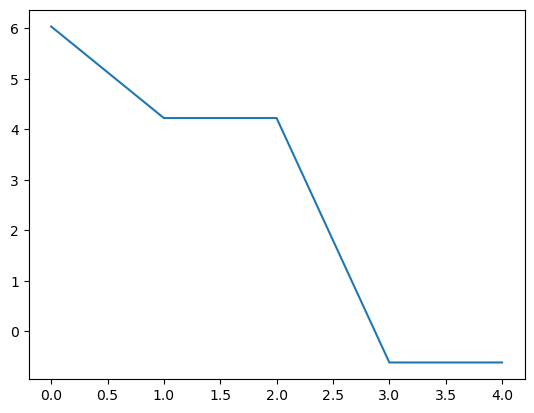

In [15]:
plt.plot(np.sum(dmd.modes.real,axis=0))


In [16]:
d_ind = np.argmax(np.abs(dmd.amplitudes.real))

if np.amax(np.abs(dmd.amplitudes.real)) == np.abs(np.min(dmd.amplitudes.real))  :
    print("Not growing")

d_ind

0

In [17]:
dmd.eigs.real[d_ind]

1.0017581758728649

In [18]:
dmd.eigs

array([ 1.00175818+0.j        ,  0.71325967+0.73919285j,
        0.71325967-0.73919285j, -0.60367615+0.75879685j,
       -0.60367615-0.75879685j])

<StemContainer object of 3 artists>

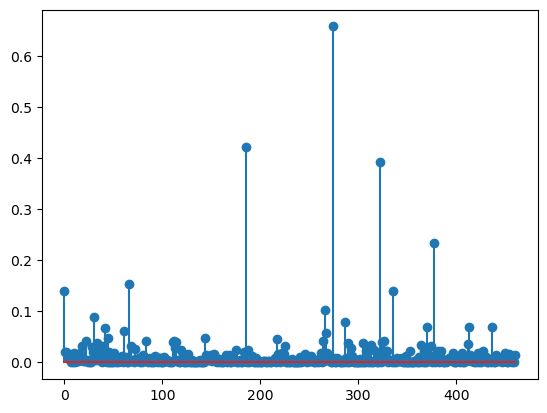

In [19]:

plt.stem(dmd.modes[:,d_ind].real)


In [20]:
days = [day1 , day2 , day3 , day4 , day5 , day6 , day7 , day8 , day9]

[ 66 377 322 185 274]


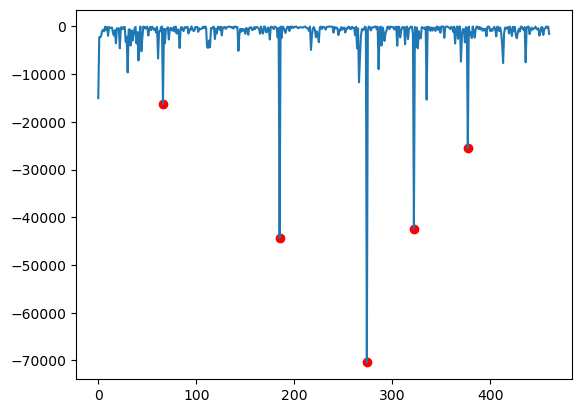

In [21]:
dmode = dmd.modes[:,d_ind].real
diff=i-day0
plt.plot(diff)


# Find the indices of the top 5 elements
top_5_indices = np.argsort(dmode.real)[-5:]
print(top_5_indices)

# Mark the indices on the plot
plt.scatter(top_5_indices,diff[top_5_indices], color='red')

plt.show()


In [22]:
np.argsort(dmd.modes[:,d_ind].real)[-5:]

array([ 66, 377, 322, 185, 274], dtype=int64)

In [23]:
_

array([ 66, 377, 322, 185, 274], dtype=int64)

In [24]:
d_ind

0

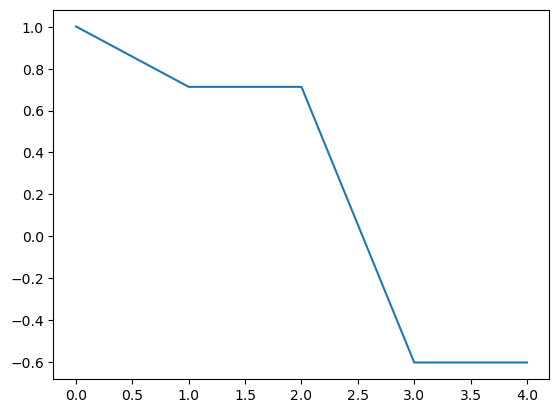

In [27]:
plt.plot(dmd.growth_rate)

c:\Users\HAI\anaconda3\envs\normie\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


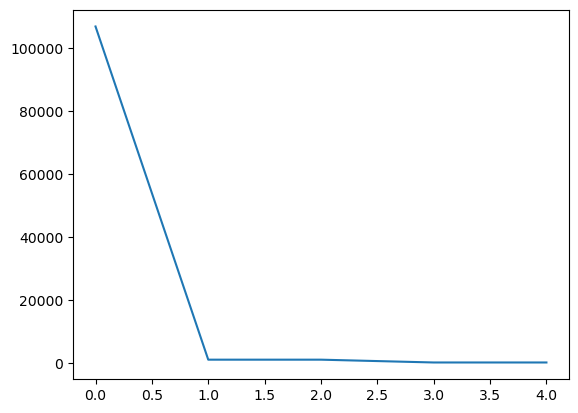

In [28]:
plt.plot(dmd.amplitudes)

In [25]:
np.argsort(dmd.amplitudes.real)

array([3, 4, 2, 1, 0], dtype=int64)